<a href="https://www.kaggle.com/code/christinlippold/kalibrierung-babinet?scriptVersionId=92374326" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/color-names/makefile
/kaggle/input/color-names/README.md
/kaggle/input/color-names/license.txt
/kaggle/input/color-names/format-colors
/kaggle/input/color-names/output/colors.json
/kaggle/input/color-names/output/colors.conf
/kaggle/input/color-names/output/colors.csv
/kaggle/input/color-names/output/colors.c
/kaggle/input/color-names/output/colors.xml
/kaggle/input/color-names/output/colors.html
/kaggle/input/color-names/output/colors.sexp
/kaggle/input/color-names/input/wiki-color-list.text
/kaggle/input/kalibrierungsbilder-babinet/DSC03187.JPG
/kaggle/input/kalibrierungsbilder-babinet/DSC03205.JPG
/kaggle/input/kalibrierungsbilder-babinet/DSC03222.JPG
/kaggle/input/kalibrierungsbilder-babinet/DSC03174.JPG
/kaggle/input/kalibrierungsbilder-babinet/DSC03249.JPG
/kaggle/input/kalibrierungsbilder-babinet/DSC03212.JPG
/kaggle/input/kalibrierungsbilder-babinet/DSC03166.JPG
/kaggle/input/kalibrierungsbilder-babinet/DSC03271.JPG
/kaggle/input/kalibrierungsbilder-babinet/DSC032

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
import click
import seaborn as sns
import matplotlib.image as img
from tqdm import tqdm_notebook
%matplotlib inline

input = "../input/kalibrierungsbilder-babinet"
!ls "../input/kalibrierungsbilder-babinet"


DSC03132.JPG  DSC03160.JPG  DSC03188.JPG  DSC03216.JPG	DSC03244.JPG
DSC03133.JPG  DSC03161.JPG  DSC03189.JPG  DSC03217.JPG	DSC03245.JPG
DSC03134.JPG  DSC03162.JPG  DSC03190.JPG  DSC03218.JPG	DSC03246.JPG
DSC03135.JPG  DSC03163.JPG  DSC03191.JPG  DSC03219.JPG	DSC03247.JPG
DSC03136.JPG  DSC03164.JPG  DSC03192.JPG  DSC03220.JPG	DSC03248.JPG
DSC03137.JPG  DSC03165.JPG  DSC03193.JPG  DSC03221.JPG	DSC03249.JPG
DSC03138.JPG  DSC03166.JPG  DSC03194.JPG  DSC03222.JPG	DSC03250.JPG
DSC03139.JPG  DSC03167.JPG  DSC03195.JPG  DSC03223.JPG	DSC03251.JPG
DSC03140.JPG  DSC03168.JPG  DSC03196.JPG  DSC03224.JPG	DSC03252.JPG
DSC03141.JPG  DSC03169.JPG  DSC03197.JPG  DSC03225.JPG	DSC03253.JPG
DSC03142.JPG  DSC03170.JPG  DSC03198.JPG  DSC03226.JPG	DSC03254.JPG
DSC03143.JPG  DSC03171.JPG  DSC03199.JPG  DSC03227.JPG	DSC03255.JPG
DSC03144.JPG  DSC03172.JPG  DSC03200.JPG  DSC03228.JPG	DSC03256.JPG
DSC03145.JPG  DSC03173.JPG  DSC03201.JPG  DSC03229.JPG	DSC03257.JPG
DSC03146.JPG  DSC03174.JPG  DSC03202.JPG  DSC032

In [3]:
#Bilder aufrufen
blist = []
for i in range(140):
    i=132+i
    i=str(i)
    bilder = img.imread("../input/kalibrierungsbilder-babinet/DSC03"+i+".JPG")
    
    blist.append(bilder)

#Kontrolle, ob alle Bilder aufgerufen werden
print(len(blist))

140


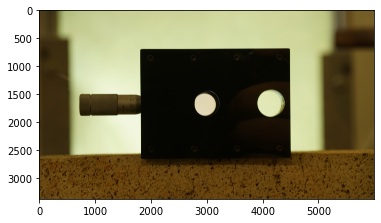

In [4]:
#Bild darstellen

bild1 = Image.fromarray(blist[0])
plt.imshow(bild1)
plt.show()

In [10]:
#Pixel auslesen
rgb_pixel_values = []
for i in range(140):
    rgb_pixel_values = (blist[i][1695:1705,2995:3005,:])
    
rgb_babinet = np.asarray(rgb_pixel_values)

rgb_babinet.shape

rgb_mittelwert = np.zeros(1,3)

for i in range(3):
    rgb_mittelwert[1,i] = np.mean(rgb_babinet:[])

(10, 10, 3)

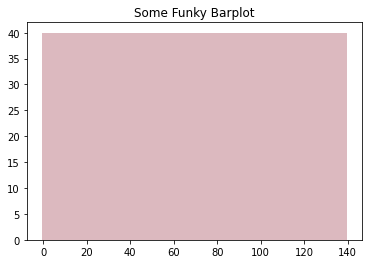

In [6]:
# Plot
height, width = 40, 1
NSAMPLES = 140
plt.bar(np.arange(NSAMPLES), height, width, color=rgb_pixel_values.reshape(-1,3))
plt.title("Some Funky Barplot")
plt.show()

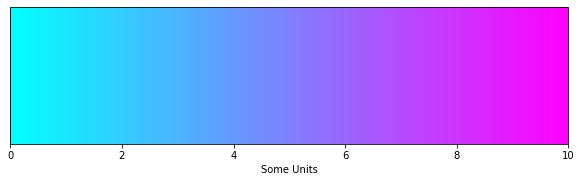

In [7]:
#Plot erstellen - Überprüfung, ob Farben richtig ausgelesen wurden
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10, 5))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=10)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Some Units')
    